<h1 style="text-align:center">
    Movies
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    Nombre Apellido1 Apellido2
</h3>
    
<h3 style="text-align:center">
    Fecha
</h3>

<hr>

# Introducción

<br>

En este proyecto se desarrolla en Python un análisis básico de datos sobre películas de cine de IMDB.
El set de datos que vamos a usar inicialmente se encuentra en la siguiente página:

https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

En ella puede encontrarse información más detallada, así como una descripción precisa de cada columna.

<font color="green">
Seguidamente, te toca a ti hacer una breve introducción, completando el fragmento de letra en azul y desarrollándolo a tu antojo. Suprime después este fragmento en verde.
</font>

<br>

Se plantean los apartados iniciales para su resolución *sin usar la libreria pandas*. Esto se propone así para forzar a practicar con las técnicas, herramientas y conceptos básicos de Python. Más adelante, hay otros apartados propuestos para su resolución con esta librería y otras.

<br>

<font color="darkblue">
A partir de los datos proporcionados, he conseguido ... pero no he podido ...

<br>

Aunque al final de este notebook detallaré la calificación que calculo honestamente, globalmente, siguiendo las puntuaciones que se asigna a cada apartado, diría que he obtenido una nota de *** sobre 10.
</font>

<br>

<font color="green">
Completa tus datos personales en la cabecera, bajo el rótulo inicial. Completa también el breve apartado anterior, con texto  azul, y pon en azul todos los comentarios tuyos, dejando en negro los míos, del enunciado. También, suprime los fragmentos en verde, como éste, que son indicaciones pero que, una vez atendidas, deben desaparecer de la solución que entregas.
</font>

# Datos de partida

(**Nota previa:** hasta el apartado específico de dataframes, se deben desarrollar las soluciones a los ejercicios propuestos sin usar la librería `pandas`, justamente para obligar a practicar con conceptos básicos de Python.)

Nuestra tabla de datos es el archivo de texto `movie_data.csv` que se encuentra en la carpeta `data_in`, y puede verse así con cualquier editor:

<br>

<center>
    <img src="./images/texto.png" width="100%">
</center>

La primera fila es la cabecera.
Esta fila cabecera contiene los nombres de los campos, separados por comas.
Yo la he marcado en azul para distinguirla fácilmente de las demás filas, que contienen los datos propiamente dichos,
esto es, los valores de dichos campos, consignando los datos de cada película en cada línea.

Si abrimos esta tabla con *excell* (importar datos csv con el separador `,`), vemos cada dato en una celda.

<br>

<center>
    <img src="./images/csv_1.png" width="100%">
</center>

<br>

Mostramos la hoja excell en dos imágenes por ser muy ancha.

<br>

<center>
    <img src="./images/csv_2.png" width="100%">
</center>

# Librerías y constantes globales

<br>

Pongamos todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.
    
De paso, en éste y otros lugares de Internet podrás encontrar detalles sobre estilo y presentación de código con un estilo estándar y cuidado. Examina esta página y trata de seguir esas indicaciones.

In [1]:
# Librerías:
import csv
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import requests
from bs4 import BeautifulSoup
import pandas as pd
import mrjob



In [2]:
# Constantes globales:
MOVIES_DATA = "data_in/movie_data.csv"
main_fields=["movie_title", "title_year", "director_name", "actor_1_name", "language", "country", "color", "budget", "imdb_score", "movie_imdb_link"]
# Esta celda debe ser completada por el estudiante



# Parte A. Ejercicios básicos sin usar `pandas` [2 puntos]

Esta parte inicial debe realizarse sin usar la librería `pandas`. Para practicar con esta librería, se plantean otros apartados más abajo.

### A.1. Exploración inicial básica del archivo de datos

Deseamos cargar el archivo de datos, que tiene un formato `csv`.
En este apartado, te recomiendo fuertemente usar la librería `cvs`,
que deberás importar en la primera celda del script, más arriba, no aquí.
(En los siguientes apartados, ya no mencionaré qué librerías usar
ni recordaré dónde se han de importar.)

Observa también que el test de funcionamiento te da el nombre de la función que deber definir
y algún otro identificador como es, por ejemplo, la constante `MOVIES_DATA`,
que debes definir también más arriba, en la segunda celda de este script.

Finalmente, observando el test, verás que se carga por separado la cabecera y las filas de datos.

In [3]:
def load_full_data(MOVIES_DATA):
    with open(MOVIES_DATA, encoding="utf-8") as MOVIES_DATA_FILE:
        data = csv.reader(MOVIES_DATA_FILE, delimiter=',', quotechar='"')
        full_header = next(data)
        full_list_data = []
        for row in data:
            full_list_data.append(row)
    return full_header, full_list_data

In [4]:
# Test de funcionamiento

full_header, full_list_data = load_full_data(MOVIES_DATA)

print(full_header)
print()
print(full_list_data[0:5])

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

[['Color', 'James Cameron', '723', '178', '0', '855', 'Joel David Moore', '1000', '760505847', 'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar\xa0', '886204', '4834', 'Wes Studi', '0', 'avatar|future|marine|native|paraplegic', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', '3054', 'English', 'USA', 'PG-13', '237000000', '2009', '936', '7.9', '1.78', '33000'], ['Color', 'Gore Verbinski', '302', '169', '563', '1000', 'Orlando Bloom', '40000', '309404152', 'Action|Adventure|F

Ahora, querríamos ver las posiciones de los identificadores de los campos, dados en la línea cabecera.

In [5]:
# Esta celda debe ser completada por el estudiante
list_of_enumerated_headers = list(enumerate(full_header))


In [6]:
# Test de funcionamiento

print(list_of_enumerated_headers)

[(0, 'color'), (1, 'director_name'), (2, 'num_critic_for_reviews'), (3, 'duration'), (4, 'director_facebook_likes'), (5, 'actor_3_facebook_likes'), (6, 'actor_2_name'), (7, 'actor_1_facebook_likes'), (8, 'gross'), (9, 'genres'), (10, 'actor_1_name'), (11, 'movie_title'), (12, 'num_voted_users'), (13, 'cast_total_facebook_likes'), (14, 'actor_3_name'), (15, 'facenumber_in_poster'), (16, 'plot_keywords'), (17, 'movie_imdb_link'), (18, 'num_user_for_reviews'), (19, 'language'), (20, 'country'), (21, 'content_rating'), (22, 'budget'), (23, 'title_year'), (24, 'actor_2_facebook_likes'), (25, 'imdb_score'), (26, 'aspect_ratio'), (27, 'movie_facebook_likes')]


### A.2. Campos principales de una película

Los campos (columnas) del archivo son demasiados. No nos interesan todos ellos. Dada una lista con todos los campos, se pide extraer otra lista sólo con los campos con los que vamos a trabajar en los siguientes apartados: `movie_title`, `title_year`, `director_name`, `actor_1_name`, `language`, `country`, `color`, `budget`, `imdb_score` y `movie_imdb_link`.

In [7]:
# Esta celda debe ser completada por el estudiante
def main_data_from_item(data_row, fields=main_fields):
    header = {value:index for index, value in enumerate(full_header)}
    indexes = [header[field] for field in fields]
    return [data_row[index] for index in indexes]

In [8]:
# Test de funcionamiento

print(main_data_from_item(full_header))

print()

datos_avatar_2009 = main_data_from_item(full_list_data[0])
print(datos_avatar_2009)

print()

datos_star_wars_7 = main_data_from_item(full_list_data[4])
print(datos_star_wars_7)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

['Avatar\xa0', '2009', 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', '237000000', '7.9', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1']

['Star Wars: Episode VII - The Force Awakens\xa0            ', '', 'Doug Walker', 'Doug Walker', '', '', '', '', '7.1', 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1']


### A.3. Algunos ajustes en los campos

Observa la anomalía en el string del título de la película. También, queremos tratar algunos campos como numéricos, ya sea enteros (el año y el presupuesto) o reales (la valoración). (Algunos campos numéricos enteros están vacíos en el archivo de datos; para ellos, el valor imputado será `-1`.) Además, en las urls de las películas no necesitaremos el fragmento final, iniciado con `?ref_`.

In [9]:
# Esta celda debe ser completada por el estudiante
def delete_ref(link):
    # return link.split("/?ref_")[0]
    # return re.sub(r"/\?ref_.*", "", link)
    return re.sub(r"\?ref_.*", "", link)

def delete_xa0(title):
    # return title.split("\xa0")[0]
    return re.sub(r"\xa0.*", "", title)

def num_int(num):
    return int(num) if num and num!=" " else -1

def num_float(num):
    return float(num) if num and num!=" " else -1

base_dic_function = {delete_ref: ["movie_imdb_link"],
                     delete_xa0: ["movie_title"],
                     num_int: ["num_critic_for_reviews", "duration", "director_facebook_likes", 
                                "actor_3_facebook_likes", "actor_1_facebook_likes", "gross", 
                                "num_voted_users", "cast_total_facebook_likes", "facenumber_in_poster", 
                                "num_user_for_reviews", "budget", "title_year", "actor_2_facebook_likes", 
                                "movie_facebook_likes"],
                     num_float: ["imdb_score", "aspect_ratio"],
                     None: ["color", "director_name", "actor_2_name", "genres", 
                            "actor_1_name", "actor_3_name", "plot_keywords", 
                            "language", "country", "content_rating"]}

dic_function=dict()
for function, names in base_dic_function.items():
    dic_function.update({name:function for name in names})


def datatypes_arranged(data_row, fields=main_fields):
    list_functions = [dic_function[field] for field in fields]
    return [function(field) if function != None else field for function, field in zip(list_functions, data_row)]


In [10]:
# Test de funcionamiento

print(datatypes_arranged(datos_avatar_2009))

print(datatypes_arranged(datos_star_wars_7))


['Avatar', 2009, 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
['Star Wars: Episode VII - The Force Awakens', -1, 'Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


### A.4. Recuperación de alguna información básica

<br>

Diseña funciones para recuperar la siguiente información:

<itemize>
    <li> El conjunto de valores posibles del campo `Color`.
    <li> Los títulos de película de nuestro archivo (limpios de caracteres extraños),
        junto con la cantidad de calificadores (un entero), que contengan la subcadena "Victor".
</itemize>

In [11]:
# Esta celda debe ser completada por el estudiante
def pos_values(field):
    header = {value:index for index, value in enumerate(full_header)}
    index = header[field]
    return {data[index] for data in full_list_data}

colores=pos_values("color")



def search_subarray_with_other_col(sub_array, list_data, field_to_search, another_field="movie_title"):
    fields = [field_to_search, another_field]
    header = {valor:indice for indice, valor in enumerate(full_header)}
    index_to_search, index_other = header[field_to_search], header[another_field]

    data_sol=[]
    for data in list_data:
        if sub_array in data[index_to_search]:
            data_searched = [data[index_to_search], data[index_other]]
            data_sol.append(tuple(datatypes_arranged(data_searched, fields)))
            
    return data_sol

pelis_victor = search_subarray_with_other_col("Victor", full_list_data, "movie_title", "num_critic_for_reviews")



In [12]:
# Test de funcionamiento

print(colores)
print(pelis_victor)

{'Color', '', ' Black and White'}
[('Victor Frankenstein', 159), ('Victor Frankenstein', 159), ('The Young Victoria', 188), ('Victor Frankenstein', 159), ('Raising Victor Vargas', 59)]


# B Datos en un diccionario [2 puntos]

### B.1. Carga únicamente de datos que vamos a usar

En lugar de cargar *todos* los datos del archivo, luego generar otro archivo con los datos que nos interesan y luego ajustarlos, es mejor diseñar una función que recorre el archivo de datos y, de cada línea del archivo, *únicamente* retiene la parte que nos interesa, cargando la cabecera por un lado y, por otro, la lista de datos de interés, ajustados como ya hemos dicho.

Cargaremos esta información en un diccionario, cuyas claves serán pares `(título, año)` y cuyos valores se recogen en una lista con el resto de los campos.

Además, los datos de cada película tras la clave `(título, año)` están repetidas en el archivo de datos, con todos los datos idénticos; y lo que es peor: alguna que está repetida, pero con algún dato distinto. En ambos casos, para simplificar, adoptamos el criterio de registrar únicamente la primera aparición de los datos de una misma película y año.

In [13]:
# Esta celda debe ser completada por el estudiante
def load_main_data(MOVIES_DATA, 
                   key_fields=["movie_title", "title_year"], 
                   other_fields=["director_name", "actor_1_name", "language", "country", "color", "budget", "imdb_score", "movie_imdb_link"]):
    with open(MOVIES_DATA, encoding="utf-8") as MOVIES_DATA_FILE:
        data = csv.DictReader(MOVIES_DATA_FILE, delimiter=',', quotechar='"')
        header_row = data.fieldnames
        main_header = [field for field in key_fields+other_fields if field in header_row]
        
        main_dict_data={}
        for row in data:
            keys = tuple(datatypes_arranged([row[field] for field in key_fields], key_fields))
            if not keys in main_dict_data:
                main_dict_data[keys] = datatypes_arranged([row[field] for field in other_fields], other_fields)

    return main_header, main_dict_data

In [14]:
# Test de funcionamiento

main_header, main_dict_data = load_main_data(MOVIES_DATA)

print(main_header)
print()
for title_year, pieces in list(main_dict_data.items())[:5]:
    print(title_year, " -> ", pieces)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

('Avatar', 2009)  ->  ['James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
("Pirates of the Caribbean: At World's End", 2007)  ->  ['Gore Verbinski', 'Johnny Depp', 'English', 'USA', 'Color', 300000000, 7.1, 'http://www.imdb.com/title/tt0449088/']
('Spectre', 2015)  ->  ['Sam Mendes', 'Christoph Waltz', 'English', 'UK', 'Color', 245000000, 6.8, 'http://www.imdb.com/title/tt2379713/']
('The Dark Knight Rises', 2012)  ->  ['Christopher Nolan', 'Tom Hardy', 'English', 'USA', 'Color', 250000000, 8.5, 'http://www.imdb.com/title/tt1345836/']
('Star Wars: Episode VII - The Force Awakens', -1)  ->  ['Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


Y ahora podemos suprimir la variable `full_list_data`

In [15]:
# Esta celda debe ser completada por el estudiante
del full_list_data


In [16]:
# Test de funcionamiento

try:
    print(full_list_data)
except:
    print('La variable full_list_data está suprimida correctamente')

La variable full_list_data está suprimida correctamente


### B.2. Recuperación de alguna información 

Diseña funciones para averiguar la siguiente información:

- ¿Qué títulos de películas han sido dirigidas por "James Cameron" (o por el director que se desee)?

In [17]:
# Esta celda debe ser completada por el estudiante
def movies_anno_for_director(full_data, sub_array):
    return [key for key, value in full_data.items() if sub_array in value[0]]



In [18]:
# Test de funcionamiento
    
movies_anno_for_director(main_dict_data, "James Cameron")

[('Avatar', 2009),
 ('Titanic', 1997),
 ('Terminator 2: Judgment Day', 1991),
 ('True Lies', 1994),
 ('The Abyss', 1989),
 ('Aliens', 1986),
 ('The Terminator', 1984)]

- ¿Qué directores han dirigido el número máximo de películas?

In [19]:
# Esta celda debe ser completada por el estudiante
def directors_max_movies(full_data):
    director_n_movies = dict()
    for row in full_data.values():
        if row[0] in director_n_movies:
            director_n_movies[row[0]] += 1
        else:
            director_n_movies[row[0]] = 1
    #director_n_movies = {director[0]: director_n_movies.get(director[0], 0) + 1 for director in full_data.values()}
    max_movies = 0
    for key, value in director_n_movies.items():
        if value > max_movies and key:
            sol=[key]
            max_movies = value
        elif value == max_movies:
            sol.append(key)

    return sol, max_movies

In [20]:
# Test de funcionamiento
    
print(directors_max_movies(main_dict_data))

(['Steven Spielberg'], 26)


- Para cada año de un intervalo dado de años, ¿cuántas películas se han realizado? Esta información debe recuperrase en un diccionario convencional (no por defecto), y luego debe mostrarse en una lista con los años en orden ascendente..

In [21]:
# Esta celda debe ser completada por el estudiante
def years_num_movies(full_data, initial_year, final_year):
    year_n_movies = dict()
    for row in full_data.keys():
        if row[1] in year_n_movies:
            year_n_movies[row[1]] += 1
        elif initial_year <= row[1] <= final_year:
            year_n_movies[row[1]] = 1
    return year_n_movies


In [22]:
# Test de funcionamiento
    
num_movies = years_num_movies(main_dict_data, 2000, 2015)

print(num_movies)

{2009: 253, 2007: 198, 2015: 211, 2012: 214, 2010: 225, 2006: 235, 2008: 223, 2013: 231, 2011: 224, 2014: 243, 2005: 216, 2004: 207, 2003: 169, 2001: 183, 2002: 204, 2000: 169}


In [23]:
# Esta celda debe ser completada por el estudiante
num_movies_sorted=[(key, value) for key, value in num_movies.items()]
num_movies_sorted.sort(key=lambda x: x[0])

In [24]:
# Test de funcionamiento
    
print(num_movies_sorted)

[(2000, 169), (2001, 183), (2002, 204), (2003, 169), (2004, 207), (2005, 216), (2006, 235), (2007, 198), (2008, 223), (2009, 253), (2010, 225), (2011, 224), (2012, 214), (2013, 231), (2014, 243), (2015, 211)]


- Diseña también una operación que, partiendo de nuestro diccionario de los datos principales, almacene en un archivo los datos siguientes de cada película, sin la cabecera: el título, el idioma, el año, el país y el presupuesto. El separador será en este caso el carácter `|`. El archivo usado para el almacenamiento es el siguiente:

    ``` python
    FEW_FIELDS = "algunos_campos.txt"
    ```

In [25]:
# Esta celda debe ser completada por el estudiante
FEW_FIELDS = "algunos_campos.txt"

def store_file(full_data, name):
    with open(name, 'w') as new_file:
        for key, values in full_data.items():
            new_file.write(f"{key[0]}|{values[2]}|{key[1]}|{values[3]}|{values[5]}\n")


In [26]:
# Test de funciomaniemto

store_file(main_dict_data, FEW_FIELDS)

! dir algunos*.*

print()

with open(FEW_FIELDS) as f:
    for i in range(5):
        print(f.readline())

 El volumen de la unidad C es Windows
 El n�mero de serie del volumen es: E29C-9D12

 Directorio de c:\Users\Usuario\Desktop\Ejercicios de uni\Ejercicio 1

07/11/2024  21:23           210.832 algunos_campos.txt
               1 archivos        210.832 bytes
               0 dirs  33.343.918.080 bytes libres

Avatar|English|2009|USA|237000000

Pirates of the Caribbean: At World's End|English|2007|USA|300000000

Spectre|English|2015|UK|245000000

The Dark Knight Rises|English|2012|USA|250000000

Star Wars: Episode VII - The Force Awakens||-1||-1



### B.3. Un conteo sencillo con `defaultdict`

Deseamos saber con qué directores y número de veces ha actuado cada actor como actor principal. Se pide realizar este conteo en un `defaultdict` cuyas claves serán nombres de los actores y cuyos valores tendrán la estructura de un `defaultdict`, cuyas claves serán los nombres de los directores y cuyos valores serán los núneros contabilizados.

In [27]:
# Esta celda debe ser completada por el estudiante
def actor_directors(full_data):
    solution = defaultdict(lambda:defaultdict(int))

    for value in full_data.values():
        solution[value[1]][value[0]]+=1

    return solution


In [28]:
# Test de funcionamiento

num_collaborations = actor_directors(main_dict_data)

print(type(num_collaborations))
key_a, value_a = list(num_collaborations.items())[0]
print(type(key_a), type(value_a))
key_b, value_b = list(value_a.items())[0]
print(type(key_b), type(value_b))

print()

print(num_collaborations)

<class 'collections.defaultdict'>
<class 'str'> <class 'collections.defaultdict'>
<class 'str'> <class 'int'>

defaultdict(<function actor_directors.<locals>.<lambda> at 0x000001B60E18C2C0>, {'CCH Pounder': defaultdict(<class 'int'>, {'James Cameron': 1, 'Peter Hyams': 1, 'Fred Dekker': 1, 'Ernest R. Dickerson': 1}), 'Johnny Depp': defaultdict(<class 'int'>, {'Gore Verbinski': 5, 'Rob Marshall': 2, 'Tim Burton': 6, 'James Bobin': 1, 'Michael Mann': 1, 'Florian Henckel von Donnersmarck': 1, 'Wally Pfister': 1, 'David Koepp': 2, 'Scott Cooper': 1, 'Albert Hughes': 1, 'Roman Polanski': 1, 'Wes Craven': 1, 'Mike Newell': 1, 'Rand Ravich': 1, 'Ted Demme': 1, 'Robert Rodriguez': 1, 'Marc Forster': 1, 'Jeremy Leven': 1, 'Laurence Dunmore': 1, 'Terry Gilliam': 1, 'Lasse Hallström': 1, 'Oliver Stone': 1, 'Rachel Talalay': 1, 'Kevin Smith': 2}), 'Christoph Waltz': defaultdict(<class 'int'>, {'Sam Mendes': 1, 'David Yates': 1, 'Michel Gondry': 1, 'Tim Burton': 1}), 'Tom Hardy': defaultdict(<class

### B.4. Print seleccionado

Demasiada información. Deseamos imprimir únicamente, para cada actor, las colaboraciones que superen un mínimo, dato entrada. Si un actor no tiene ninguna colaboración que supere dicho mínimo, lógicamente no debe mostrarse.

In [29]:
# Esta celda debe ser completada por el estudiante
def some_movies(defdict, min_movies):
    for actor, director_movies in defdict.items():
        final=[(director, movies) for director, movies in director_movies.items() if movies >= min_movies]
        
        if final:
            print(f"{actor}  -->  {final}")

some_movies(num_collaborations, 5)


Johnny Depp  -->  [('Gore Verbinski', 5), ('Tim Burton', 6)]
Leonardo DiCaprio  -->  [('Martin Scorsese', 5)]
Robert De Niro  -->  [('Martin Scorsese', 7)]
Bill Murray  -->  [('Wes Anderson', 5)]
Clint Eastwood  -->  [('Clint Eastwood', 10)]
Woody Allen  -->  [('Woody Allen', 10)]


# C. Algunos gráficos sencillos [1 punto]


### C.1 Un modelo de gráfica

Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [30]:
# Esta celda debe ser completada por el estudiante
def representar_xxx_yyy(numbers, optional_elements=["","",""]):
    xpoints = []
    ypoints = []
    for x, y in numbers:
        xpoints.append(x)
        ypoints.append(y)

    title, Xaxis_name, Yaxis_name = optional_elements
    plt.plot(xpoints, ypoints)
    plt.title(title)
    plt.xlabel(Xaxis_name)
    plt.ylabel(Yaxis_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


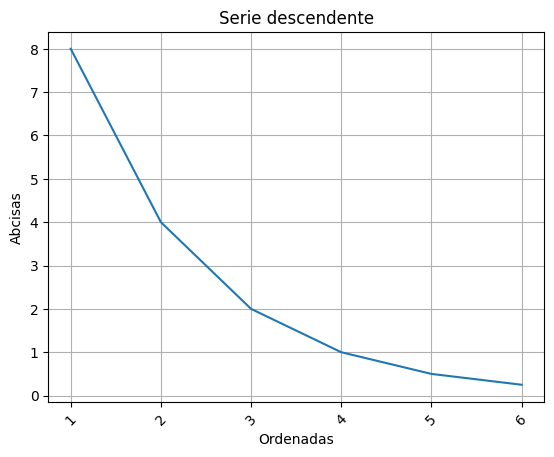

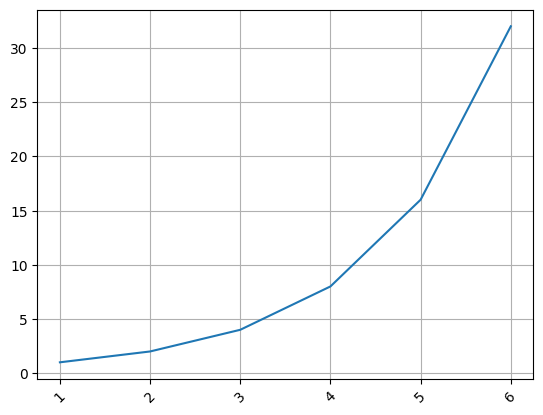

In [31]:
# Pruebas de funcionamiento:

representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Serie descendente", "Ordenadas", "Abcisas"])

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)])

### Una gráfica concreta

Deseamos representar el número de películas de nuestra base de datos que se han producido en un intervalo de años dado.

In [32]:
# Esta celda debe ser completada por el estudiante
def repr_movies_years(full_data, initial_year, final_year):    
    num_movies = years_num_movies(full_data, initial_year, final_year)
    num_movies_sorted = [(key, value) for key, value in num_movies.items()]
    num_movies_sorted.sort(key=lambda x: x[0])

    representar_xxx_yyy(num_movies_sorted,["Number of movies in our database", "years", "num. movies in a year"])

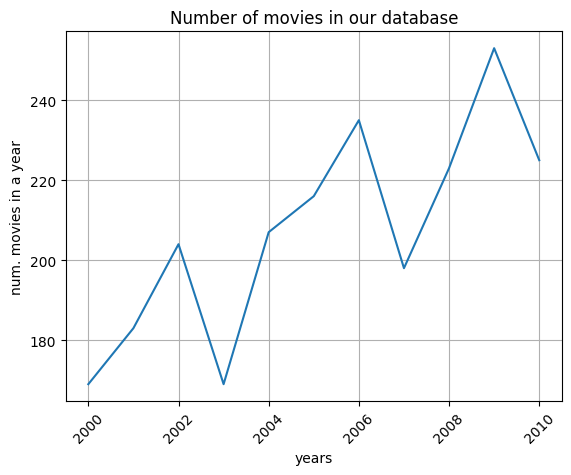

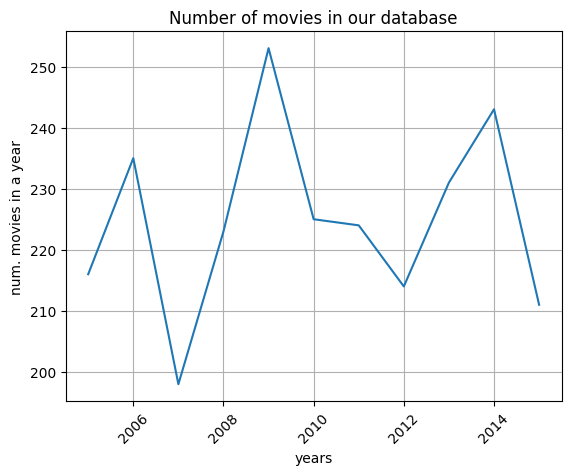

In [33]:
# Test de funcionamiento

repr_movies_years(main_dict_data, 2000, 2010)
repr_movies_years(main_dict_data, 2005, 2015)

# D. Acceso a las urls de imdb y webscraping [2 puntos]

### D.1. Recuperación de las URLs

Con sencillas instrucciones, deseamos recuperar todas las *urls* de las películas de nuestro archivo, mostrando cuántas son, la primera de ellas o las diez primeras por ejemplo:

In [34]:
# Esta celda debe ser completada por el estudiante
urls = [data[-1] for data in main_dict_data.values()]

first_url_movie = urls[0]

first_ten_urls = urls[:10]

In [35]:
# Test de funcionamiento

print(len(urls))

print()

print(first_url_movie)

print()

print(first_ten_urls)

4919

http://www.imdb.com/title/tt0499549/

['http://www.imdb.com/title/tt0499549/', 'http://www.imdb.com/title/tt0449088/', 'http://www.imdb.com/title/tt2379713/', 'http://www.imdb.com/title/tt1345836/', 'http://www.imdb.com/title/tt5289954/', 'http://www.imdb.com/title/tt0401729/', 'http://www.imdb.com/title/tt0413300/', 'http://www.imdb.com/title/tt0398286/', 'http://www.imdb.com/title/tt2395427/', 'http://www.imdb.com/title/tt0417741/']


In [36]:
# Una forma de evitar el error "Requests 403 forbidden" al hacer web scraping en las siguientes celdas:

HEADERS = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Cache-Control": "max-age=0",
    }

### D.2. Carga de la estructura sintáctica de una URL

Ahora, deseamos extraer el código `html` de una película.

In [37]:
# Esta celda debe ser completada por el estudiante
def soup_movie(url):
    response = requests.get(url, headers= HEADERS)
    soup = BeautifulSoup(response.content, 'lxml')
    return soup


In [38]:
# Test de funcionamiento

soup = soup_movie(first_url_movie)

print(str(soup)[:1000])
print()
print("... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...")
print()
print(str(soup)[-1000:])

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1731010999267);
        }
    })</script><title>Avatar (2009) - IMDb</title><meta content="Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and pr

### D.3. Extracción de algunas piezas de información de una URL

Y ahora, con dicho código, deseamos extraer la siguiente información, referida a la película `first_url_movie`:

- La etiqueta completa del título de la película
- La descripción (sólo el contenido).
- La lista de los actores del *reparto principal*
- La información sobre el presupuesto

In [39]:
# Esta celda debe ser completada por el estudiante
title = soup.title
# title_string = soup.title.string  En caso de que se quiera la parte de dentro de la etiqueta del titulo
meta = soup.find("meta", {"name": "description"}).get("content")
actors = soup.find_all("a", {"data-testid": "title-cast-item__actor"})
actors_list = [actor.get_text() for actor in actors]
boxoffice_budget = soup.find("li", {"data-testid": "title-boxoffice-budget"})
budget = boxoffice_budget.find("span", {"class": "ipc-metadata-list-item__list-content-item"}).get_text()

print(title, end="\n\n")

print(meta, end="\n\n")

print(actors_list, end="\n\n")

print(budget, end="\n\n")




<title>Avatar (2009) - IMDb</title>

Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Michelle Rodriguez', 'Stephen Lang', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy']

$237,000,000 (estimated)



### D.4. Actores que intervienen en una lista de URLs

Necesitamos crear un archivo con los actores del reparto principal de las películas de IMDB, dada la lista de sus URLs.

In [40]:
# Esta celda debe ser completada por el estudiante
def gather_actors(name, urls):
    with open(name, 'w') as new_file:
        for url in urls:
            soup = soup_movie(url)
            actors = soup.find_all("a", {"data-testid": "title-cast-item__actor"})
            for actor in actors:
                new_file.write(actor.get_text()+"\n")


In [41]:
# Test de funcionamiento

# OJO: esta operación puede llevar bastante tiempo.
# Para esta prueba, usamos un número limitado de películas.

gather_actors("actors_3_first_movies.txt", urls[:3])

! type actors_3_first_movies.txt

Sam Worthington
Zoe Saldana
Sigourney Weaver
Michelle Rodriguez
Stephen Lang
Giovanni Ribisi
Joel David Moore
CCH Pounder
Wes Studi
Laz Alonso
Dileep Rao
Matt Gerald
Sean Anthony Moran
Jason Whyte
Scott Lawrence
Kelly Kilgour
James Patrick Pitt
Sean Patrick Murphy
Johnny Depp
Orlando Bloom
Keira Knightley
Geoffrey Rush
Jack Davenport
Bill Nighy
Jonathan Pryce
Lee Arenberg
Mackenzie Crook
Kevin McNally
David Bailie
Stellan Skarsg�rd
Tom Hollander
Naomie Harris
Martin Klebba
David Schofield
Lauren Maher
Dermot Keaney
Daniel Craig
Christoph Waltz
L�a Seydoux
Ralph Fiennes
Monica Bellucci
Ben Whishaw
Naomie Harris
Dave Bautista
Andrew Scott
Rory Kinnear
Jesper Christensen
Alessandro Cremona
Stephanie Sigman
Tenoch Huerta
Adriana Paz
Domenico Fortunato
Marco Zingaro
Stefano Elfi DiClaudia


In [42]:
# La siguente llamada llevaría un tiempo realmente largo:

# import time # para cronometrar esta función, que tarda mucho

# reloj_inicio = time.time()
# gather_actors("actors_all_movies.txt", urls)
# reloj_fin = time.time()

# print("Tiempo invertido: %s segundos." % (reloj_fin - reloj_inicio))

# E. Pandas [2 puntos]

### E.1. El primer paso es la carga del archivo en un dataframe

In [43]:
# Esta celda debe ser completada por el estudiante
# MOVIES_DATA = "data_in/movie_data.csv"

def load_dataframe(csv_name):
    df = pd.read_csv(csv_name)
    return df


In [44]:
# Test de funcionamiento

tabla_completa = load_dataframe(MOVIES_DATA)

tabla_completa

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


### E.2. Tabla de los campos principales

A pertir de la tabla anterior, construimos otra con sólo algumos de los campos:

In [45]:
# Esta celda debe ser completada por el estudiante
def fields_selected_dataframe(full_data_frame):
    return full_data_frame[main_fields]



In [46]:
# test de comprobación

tabla_breve = fields_selected_dataframe(tabla_completa)

tabla_breve

,movie_title,title_year,director_name,actor_1_name,language,country,color,budget,imdb_score,movie_imdb_link
0,Avatar,2009.0,James Cameron,CCH Pounder,English,USA,Color,237000000.0,7.9,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,2007.0,Gore Verbinski,Johnny Depp,English,USA,Color,300000000.0,7.1,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,2015.0,Sam Mendes,Christoph Waltz,English,UK,Color,245000000.0,6.8,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,2012.0,Christopher Nolan,Tom Hardy,English,USA,Color,250000000.0,8.5,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,Doug Walker,NaN,NaN,NaN,NaN,7.1,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,2013.0,Scott Smith,Eric Mabius,English,Canada,Color,NaN,7.7,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,NaN,NaN,Natalie Zea,English,USA,Color,NaN,7.5,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,2013.0,Benjamin Roberds,Eva Boehnke,English,USA,Color,1400.0,6.3,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,2012.0,Daniel Hsia,Alan Ruck,English,USA,Color,NaN,6.3,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.3. Columnas de una tabla

¿Cuáles son las columnas de nuestrsa `tabla_breve`?

In [47]:
# Esta celda debe ser completada por el estudiante
tabla_breve.columns


Index(['movie_title', 'title_year', 'director_name', 'actor_1_name',
       'language', 'country', 'color', 'budget', 'imdb_score',
       'movie_imdb_link'],
      dtype='object')

### E.4. Campos missing

Algunos campos muestran un valod `NaN`. Deseamos cambiarlo por una cadena de caracteres: `"Desc"`.

In [48]:
# Esta celda debe ser completada por el estudiante
tabla_breve = tabla_breve.fillna("Desc")


In [49]:
# Test de comprobación

tabla_breve

,movie_title,title_year,director_name,actor_1_name,language,country,color,budget,imdb_score,movie_imdb_link
0,Avatar,2009.0,James Cameron,CCH Pounder,English,USA,Color,237000000.0,7.9,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,2007.0,Gore Verbinski,Johnny Depp,English,USA,Color,300000000.0,7.1,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,2015.0,Sam Mendes,Christoph Waltz,English,UK,Color,245000000.0,6.8,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,2012.0,Christopher Nolan,Tom Hardy,English,USA,Color,250000000.0,8.5,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,Desc,Doug Walker,Doug Walker,Desc,Desc,Desc,Desc,7.1,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,2013.0,Scott Smith,Eric Mabius,English,Canada,Color,Desc,7.7,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Desc,Desc,Natalie Zea,English,USA,Color,Desc,7.5,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,2013.0,Benjamin Roberds,Eva Boehnke,English,USA,Color,1400.0,6.3,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,2012.0,Daniel Hsia,Alan Ruck,English,USA,Color,Desc,6.3,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.5. Director $\rightarrow$ películas y número de películas

Función que averigua la lista de títulos de películas de un director dado:

In [50]:
# Esta celda debe ser completada por el estudiante
def titulos_de_director_df(df, director_name):
    return df[df["director_name"] == director_name][["movie_title"]]


In [51]:
# Test de comprobación:

tabla_tits = titulos_de_director_df(tabla_breve, "James Cameron")
tabla_tits

,movie_title
0,Avatar
26,Titanic
288,Terminator 2: Judgment Day
291,True Lies
606,The Abyss
2486,Aliens
3575,The Terminator


In [52]:
list_tits = tabla_tits["movie_title"].to_list()
print(list_tits)

['Avatar\xa0', 'Titanic\xa0', 'Terminator 2: Judgment Day\xa0', 'True Lies\xa0', 'The Abyss\xa0', 'Aliens\xa0', 'The Terminator\xa0']


Deseamos saber qué directores han dirigido el máximo número de películas, junto con ese número de películas.

In [53]:
# Esta celda debe ser completada por el estudiante
def directors_max_movies_df(df):
    sol = dict(df["director_name"].value_counts())
    sol.pop("Desc")

    max_movies = 0
    for key, value in sol.items():
        if value > max_movies and key:
            sol=[key]
            max_movies = value
        elif value == max_movies:
            sol.append(key)
        else:
            # Añado este break porque se que el metodo .value_counts devuelve un objeto ordenado 
            break
    
    return sol, max_movies


In [54]:
# test de comprobación:

directors_max_movies_df(tabla_breve)

(['Steven Spielberg'], 26)

# Parte F. Un cálculo masivo con map-reduce [0,5 puntos]

En este apartado se ha de realizar un programa aparte, *basado en la técnica de map-reduce*, que calcule, para cada idioma, en qué países en que se han producido películas y la suma de los presupuestos de dichas películas. Cuando el idioma o el país o el presupuesto no se conozcan, no se considerará esta película.

    C:\...> python language_budget_countries.py -q algunos_campos.txt

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

In [55]:
# Hagamos una llamada al programa de consola desde aquí:

! python language_budget_countries.py -q algunos_campos.txt

"Aboriginal"	[["UK", "Australia"], 86000000]
"Arabic"	[["Egypt", "Turkey", "United Arab Emirates", "France"], 11225000]
"Aramaic"	[["USA"], 30000000]
"Bosnian"	[["USA"], 13000000]
"Cantonese"	[["Hong Kong", "China"], 154500000]
"Chinese"	[["China"], 12000000]
"Czech"	[["Czech Republic"], 84450000]
"Danish"	[["Denmark"], 50100000]
"Dari"	[["USA", "Afghanistan"], 20046000]
"Dutch"	[["Netherlands"], 32150000]
"Dzongkha"	[["Australia"], 1800000]
"English"	[["Japan", "Aruba", "Iceland", "Poland", "Czech Republic", "Romania", "Thailand", "Bulgaria", "Nigeria", "Iran", "Georgia", "West Germany", "UK", "Hungary", "Netherlands", "India", "Italy", "Norway", "Denmark", "New Line", "Libya", "Ireland", "South Africa", "Kyrgyzstan", "Belgium", "Canada", "New Zealand", "South Korea", "Hong Kong", "Mexico", "Greece", "Philippines", "Russia", "Bahamas", "Peru", "Switzerland", "Official site", "China", "USA", "Chile", "Brazil", "France", "Panama", "Spain", "Germany", "Australia"], 141954875246]
"Filipin

In [56]:
# Para que el resultado se almacene en un archivo:

! python language_budget_countries.py -q algunos_campos.txt > language_countries_budgets.txt

La siguiente celda me permite ver tu programa cómodamente desde aquí.

In [57]:
def print_file(filename):
    with open(filename, "r") as f:
        for line in f:
            print(line, end="")
            
print_file("language_budget_countries.py")

from mrjob.job import MRJob

class MRcountry_budget(MRJob):

    def mapper(self, _, line):
        line = line.split("|")
        if not line[1] or not line[3] or int(line[4])==-1:
            return
        else:
            language, country, budget = line[1], line[3], int(line[4])
            yield language, [country, budget]



    def reducer(self, key, values):
        total_budget = 0
        countries = set()
        for country, budget in values:
            total_budget += budget
            countries.add(country)
        yield key, [list(countries), total_budget]

if __name__ == '__main__':
    MRcountry_budget.run()

# Parte G. Un apartado libre [0.5 puntos]

<br>

<font color="green">
Dejo este apartado a tu voluntad. Inventa tú mismo el enunciado y resuélvelo.
El enunciado deberá estar
<b>relacionado con el análisis de datos y con el tema de este proyecto</b>.
También, la idea es mostrar algún aspecto de programación en Python no contemplado o alguna técnica o librería que no has puesto en juego en los apartados anteriores. Concretamente, se valorará el uso de <b>la librería pandas</b>,
que hemos estudiado de un modo bastante sucinto en este módulo y tratado de forma insuficiente en este proyecto de programación,
o quizá puedes también usar alguna otra librería gráfica,
distinta de matplotlib.
    
En la evaluación, si este apartado está bien o muy bien, anota un 0,3 o 0,4. El 0,5 lo reservaremos para las situaciones en que se presente algo brillante, con alguna idea original o alguna técnica novedosa o complejidad especial o algún gráfico vistoso. Especialmente quien opta a un 9,5 o más, debe esmerarse en plantear este apartado a la altura de esa calificación.
</font>

<br>

<font color="darkblue">
Tras eliminar el párrafo anterior, en verde, sustituye éste por tu enunciado, cuya fuente aparecerá en azul oscuro.
</font>

In [58]:
# Este apartado debe ser completado por el estudiante



In [59]:
# Pruebas de funcionamiento, también tarea del estudiante:



# Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** ......................................
-   **Nombre:** ......................................
-   **Email:** ......................................
-   **Fecha:** ......................................

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

<font color="green">
Aquí vienen comentarios del estudiante. Lo siguiente es un ejemplo posible obviamente ... elimina este párrafo y redacta el tuyo propio, en azul.
</font>

<br>

<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.0  / 2.5  |Completamente resuelto |
|b)  |0.0  / 2.0  |No lo he conseguido |
|c)  |0.0  / 1.5  |No he entendido el enunciado |
|d)  |0.25 / 1.0  |Sólo he conseguido una parte mínima |
|e)  |0.0  / 2.0  |No lo he conseguido |
|f)  |0.5  / 0.5  |No lo he conseguido más que mínimamente |
|g)  |0.0  / 0.5  |No he logrado el correcto funcionamiento |
|**Total** |**2.75** / 10.0|**Suspenso**|
</font>

<br>

<font color="black">
   
### Ayuda recibida y fuentes utilizadas
    
</font>

<br>

<font color="green">
... comentarios del estudiante ...
Pon tú este párrafo con tus propias observaciones. Elimina este párrafo en verde.
</font>

<br>

<font color="black">
    
### Comentario adicional

</font>

<br>

<font color="green">
... Este apartado es optativo. Si lo completas, ponlo en azul; si no, suprímelo con su título.

<br>

In [60]:
# Esta celda se ha de respetar: está aquí para comprobar
# el funcionamiento de algunas funciones por parte de tu profesor
